# Diference Heat Equation

### Heat Equation: 

$$ \frac{\partial{U}}{\partial{t}} = \alpha ^ 2 \frac{\partial ^2 U}{\partial x^2} $$

### Heat Difference Equation

$$U_{x, t+1} = U_{x, t} + \alpha ^2\frac{\Delta t}{\Delta x ^2}(U_{x+1, t} + U_{x-1, t} - 2U{x, t})$$

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML, Image

In [9]:
# ----------------- Constants ----------------- #
dx = 0.1 
dt = 0.001
L = 10          # m (Width)
a = 0.000111    # m^2/s(Thermal Diffusivity)

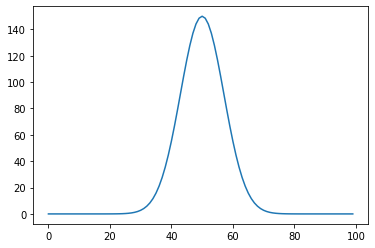

In [13]:
# ----------------------- Initial Conditions ----------------------- #

g_center  = [5]
g_t     = [150]
i_center = []
i_t = []

def u0(x, g_center = [], g_t = [], i_center = [], i_t = []):
    ret = 0
    for i, j in enumerate(g_center):
        ret = ret + np.exp(-(x-g_center[i])**2)*g_t[i]
    if(x in i_center):
        ret += i_t[i_center.index(x)]
    return ret

x = [u0(i/10, g_center = g_center, g_t = g_t, i_center = i_center, i_t = i_t) for i in range(int(L/dx))]

plt.plot(x)
plt.show()

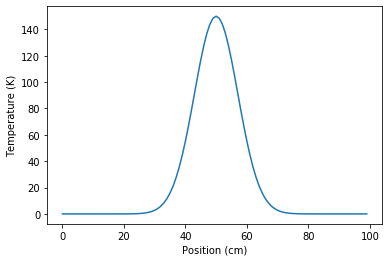

In [7]:
# ---------------------- Iterations ---------------------- #

x_max = len(x)-1
u      = [i for i in x]     # Temperatures
next_u = [i for i in x]     # Next Temperatures

k = (a*a*dt)/(dx*dx)

fig, ax = plt.subplots()
interval = np.arange(0, L/dx)
zero = [0 for i in interval]
line, = ax.plot(interval, x)
ax.set_xlabel("Position (cm)")
ax.set_ylabel("Temperature (K)")

def init():
    line.set_ydata(x)
    return line,


def animate(i):
    global next_u
    global u
    for j in range(1, x_max):
        next_u[j] = k*(u[j-1]+u[j+1]-2*u[j]) + u[j]
    next_u[0] = next_u[1]
    next_u[x_max] = next_u[x_max-1]
    line.set_ydata(next_u)
    u = [i for i in next_u]
    return line,

ani = animation.FuncAnimation(fig, animate, interval=1, blit=True, frames=1000)
rc('animation', html='html5')
ani.save('animation.gif', writer='imagemagick')

In [8]:
Image(url='animation.gif')